In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train=pd.read_csv("train_total.csv",index_col=False)
train.dropna()

,Unnamed: 0,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,...,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID,Unnamed: 22,EPRTRAnnexIMainActivityCode,EPRTRSectorCode
0,0,10,4,49,6785,3387,4137,0,0,8,...,20681,7610,9504,13648,2,32035,2469,28501,70,9
1,1,15,4,50,3413,6709,4364,0,2,11,...,23028,13061,16999,21741,1,3648,4127,28501,70,9
2,2,28,8,58,1328,1438,3347,0,1,12,...,2322,5081,8287,10933,2,43991,1580,28501,70,9
3,3,5,2,64,565,2632,2117,0,2,5,...,3284,33677,26931,34589,0,6826,1100,28501,70,9
4,4,8,8,70,6220,6874,4451,0,1,11,...,21467,36904,31175,38065,2,4681,1401,28501,70,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65623,65623,4,2,64,425,2586,2324,0,0,1,...,30819,43030,35448,42348,0,40959,884,1814,2,0
65624,65624,8,2,64,6255,7142,2987,0,2,1,...,15428,9356,7390,5359,0,12911,40,3299,2,0
65625,65625,27,8,58,5447,3814,3479,0,1,3,...,14668,53323,53506,53858,2,44480,2631,19908,50,4
65626,65626,15,4,69,3770,1665,4664,0,2,7,...,29347,15775,11849,12482,0,26725,196,14307,17,2


In [41]:
temp=['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
       'pollutant', 'reportingYear', 'MONTH', 'DAY', 'CONTINENT',
       'max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_temp',
       'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID']
train_labels=['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
        'reportingYear', 'MONTH', 'DAY', 'CONTINENT',
       'max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_temp',
       'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID']

pca_3=['countryName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','City',
       'MONTH','max_wind_speed', 'avg_wind_speed', 
       'min_wind_speed','max_temp','avg_temp', 'min_temp','DAY WITH FOGS', 'REPORTER NAME']
x=train[pca_3].values
y=train['pollutant'].values#.reshape((65628,1))
x.shape

(65628, 13)

In [38]:
y.shape

(65628,)

In [42]:

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=0)

In [14]:
y_train.shape

(45939, 1)

In [15]:
x_train.shape

(45939, 20)

In [ ]:
y_train

In [45]:
model = RandomForestClassifier(n_estimators=200, max_depth=100, random_state=0)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output

model.score(x_test,y_test)

0.6842201499360029

In [46]:
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      5838
           1       0.93      0.86      0.90      4164
           2       0.61      0.70      0.65      6405

    accuracy                           0.68     16407
   macro avg       0.72      0.70      0.71     16407
weighted avg       0.69      0.68      0.69     16407



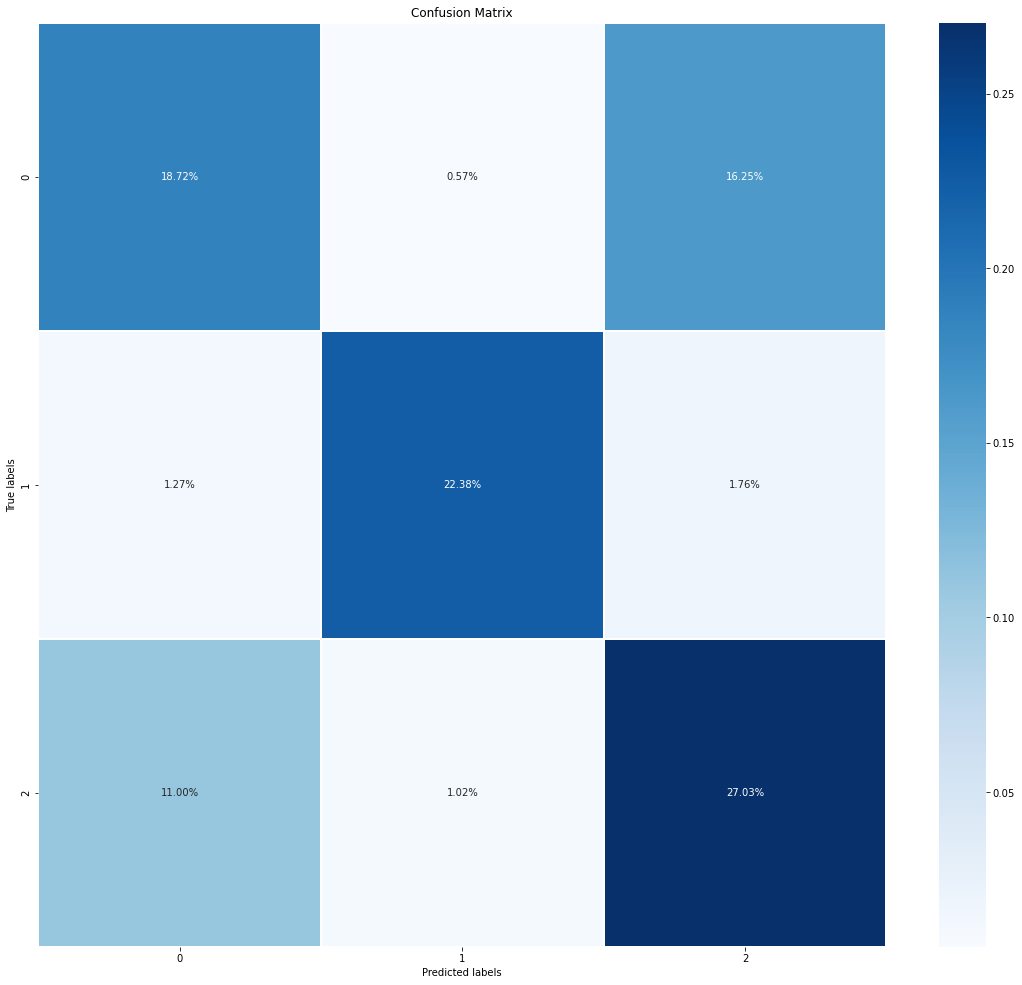

In [21]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 